#Littérature
* (Pandya 95) :
 * Foetus normaux : CN augmente avec LCC
 * Foetus anormaux ($\forall$ défaut) : 77% ou 78% d'entre eux ont une CN au delà du 95eme percentile 
 * Explique le comprmis FP/FN en fonction du seuil
* (Snijders 98) :
 * Eux au moins sont clairs et succincts : " Risk of trisomy 21 was calculated from the maternal age and gestational-age-related prevalence, multiplied by a likelihood ratio depending on the deviation from normal in nuchal-translucency thickness for crown-rump length"
 * Ils n'étudient pas tous les seuils (du coup quel est l'intérêt par rapport à l'étude de 95 ?) et concluent : "Selection of the high-risk group for invasive testing by this method allows the detection of about 80% of affected pregnancies. However, even this method of risk assessment requires about 30 invasive tests for identification of one affected fetus."
* (Wright 2008)
 * Rentrent dans le vif du sujet "To quantify this deviation the measured NT is either subtracted (delta NT) or divided by the expected median (multiple of the median method, MoM). This study examines the validity of these methods."
 * en plus on dirait qu'ils savent faire des stats : "the distribution of NT was not gaussian". 
 * Ils supposent un GMM (Gaussian mixture model) qu'ils justifient avec des arguments diagnostiques
* (Kagan wright 2009)
 * Méthodo intéressante : si l'échographiste est mauvais ça donne de mauvais résultat. Merci Sherlock. Je plaisante, c'est intéressant d'avoir quantifié précisément de combien un déviation de quelques millimètres dans l'estimation pourrissait la performance du test.


# Questions :
 * Corrélation entre CN et age maternel ?
 * Corrélation entre CN et age gestationnel ?

# Chargement des données
## Ouverture des fichiers Excel

In [71]:
import pandas as pd
from matplotlib_venn import venn2
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy

In [4]:
data1 = pd.read_excel('Datas2013-1BIONUQUALOA1.xlsx')
data2 = pd.read_excel('Datas2013-2BIONUQUALOA1.xlsx')
data3 = pd.read_excel('Datas2014-1BIONUQUALOA1.xlsx')

Column in Data2013-1, but neither in Data2013-2 nor Data2014 : {'MoM HCG Totale T2'}
Columns not in Data2013-1, but in Data2013-2 and Data2014 : {' caryotype_texte', ' date_accouchement', ' issue_nature', ' autre_anomalie', ' terme', ' caryotype', ' type', ' issue_connue', ' T21'}


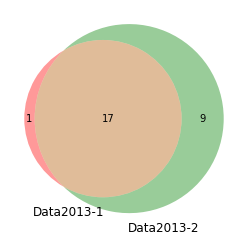

In [24]:
assert(all(data2.columns == data3.columns))
venn2([set(data1.columns), set(data2.columns)], set_labels=['Data2013-1', 'Data2013-2'])
print("Column in Data2013-1, but neither in Data2013-2 nor Data2014 : "+str(set(data1.columns) -set(data2.columns)))
print("Columns not in Data2013-1, but in Data2013-2 and Data2014 : "+str(set(data2.columns) -set(data1.columns)))

## Extraction des données pertinentes

In [51]:
data= pd.concat([data1, data2, data3])[['LCC','Clarté nucale', 'Date Nuque', 'DDG', 'DDN']].dropna()

In [83]:
data['Age Maternel'] = data['Date Nuque'] - data['DDN']
data['Age Gestationnel'] = data['Date Nuque'] - data['DDG']
data['Age Maternel en jours'] = data['Age Maternel'].dt.days
data['Age Gestationnel en jours'] = data['Age Gestationnel'].dt.days
data[:10]

,LCC,Clarté nucale,Date Nuque,DDG,DDN,Age Maternel,Age Gestationnel,Age Maternel en jours,Age Gestationnel en jours
0,73.6,2.1,2012-12-31,2012-10-13,1984-01-01,10592 days,79 days,10592,79
1,81.0,2.5,2013-01-02,2012-10-12,1977-05-05,13026 days,82 days,13026,82
2,55.3,1.4,2012-12-27,2012-10-18,1985-01-28,10195 days,70 days,10195,70
3,49.3,1.0,2012-12-21,2012-10-17,1987-02-08,9448 days,65 days,9448,65
4,69.0,3.9,2013-01-02,2012-10-17,1985-12-07,9888 days,77 days,9888,77
5,73.0,3.2,2013-01-02,2012-10-22,1969-03-03,16011 days,72 days,16011,72
6,66.0,6.0,2013-01-02,2012-10-16,1968-08-23,16203 days,78 days,16203,78
7,56.0,2.0,2012-12-28,2012-10-19,1966-08-17,16935 days,70 days,16935,70
8,69.9,3.3,2012-12-20,2012-10-03,1985-06-15,10050 days,78 days,10050,78
10,69.0,2.7,2012-12-28,2012-10-16,1979-05-26,12270 days,73 days,12270,73


In [54]:
len(data)

506268

# Corrélations ?

On fait un test de spearman, car le pearson présuppose une distrib gaussienne pour le calcul de la p-valeur, or Wright nous a mâché le boulot en nous expliquant que justement c'est pas guassien.

## Age maternel et clarté nucale

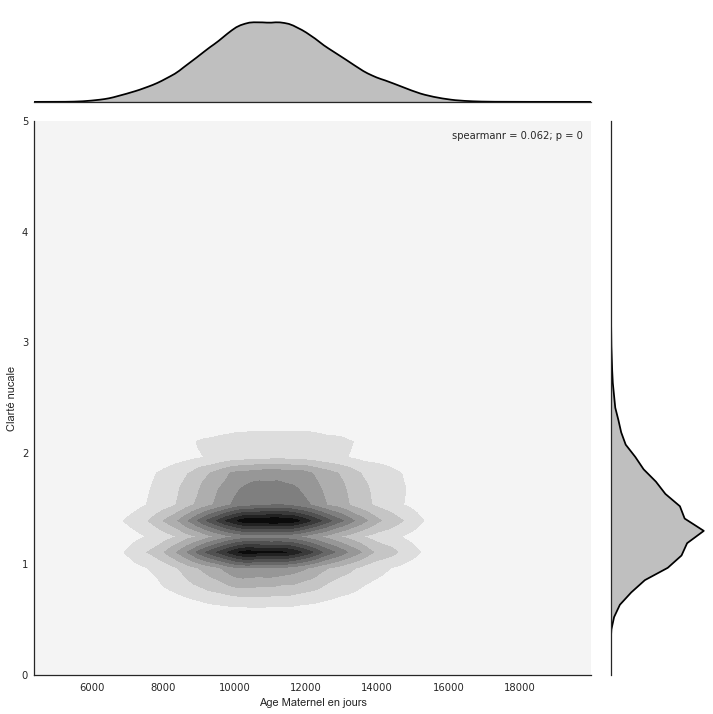

In [88]:
plt.figure(figsize=(15,15))
with sns.axes_style("white"):
    sns.jointplot(x=data['Age Maternel en jours'],
                  y=data['Clarté nucale'],
                  ylim=[0, 5],
                  kind="kde", color="k",
                  size=10,
                stat_func=scipy.stats.spearmanr);
#plt.savefig('CNvsAM.pdf')

# Corrélation age gestationnel et clarté nucale

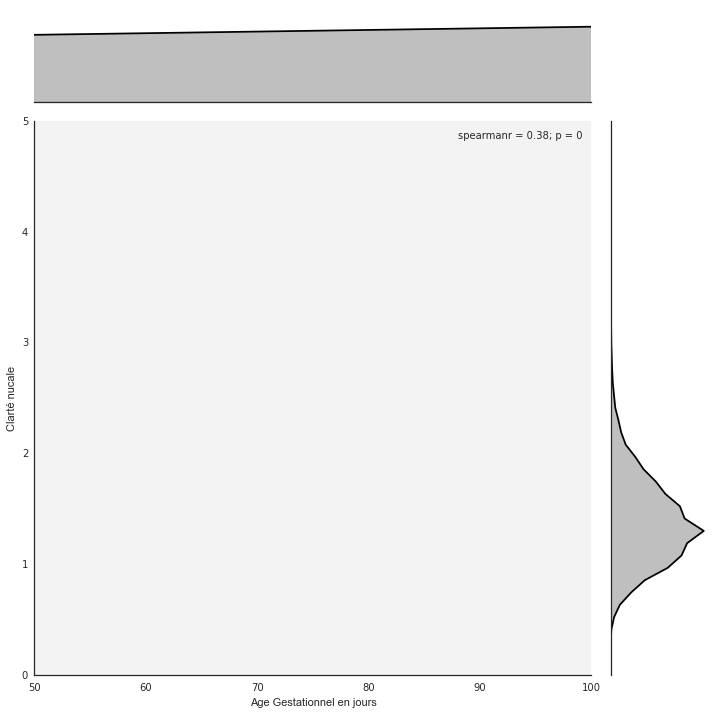

In [89]:
plt.figure(figsize=(15,15))
with sns.axes_style("white"):
    sns.jointplot(x=data['Age Gestationnel en jours'],
                  y=data['Clarté nucale'],
                  ylim=[0, 5],
                  xlim=[0,150],
                  kind="kde", color="k",
                  size=10,
                stat_func=scipy.stats.spearmanr);